# DAT19 Class 5 - Model Evaluation


# Cross Validation with KNN

Part of the big step with this lab is understanding general sklearn syntax. Each family of classification algorithms have various knobs and levers to tune it appropriately but there is a general overall structure to these models that will help you as you move forward.
1. All models need to be trained. Sklearn models have a `.fit` method for doing so.
2. We need to use the model to make a guess. the `.predict` method takes data and returns the model's guess for the value. Stipulations around this pertain to the specific model.

Last time, we imported our data from the UCI Machine Learning repository using pandas. Scikit-learn also includes some well-known datasets. So, for convenience, we will import the iris data set from sklearn this time.

In [1]:
import numpy as np

In [2]:
# from the datasets load the iris data into a variable called iris
from sklearn import datasets

sk_iris = datasets.load_iris()

In [3]:
type(sk_iris)

sklearn.datasets.base.Bunch

In [4]:
print sk_iris

{'target_names': array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10'), 'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.

In [5]:
help(sk_iris)

Help on Bunch in module sklearn.datasets.base object:

class Bunch(__builtin__.dict)
 |  Container object for datasets: dictionary-like object that
 |  exposes its keys as attributes.
 |  
 |  Method resolution order:
 |      Bunch
 |      __builtin__.dict
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, **kwargs)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from __builtin__.dict:
 |  
 |  __cmp__(...)
 |      x.__cmp__(y) <==> cmp(x,y)
 |  
 |  __contains__(...)
 |      D.__contains__(k) -> True if D has a key k, else False
 |  
 |  __delitem__(...)
 |      x.__delitem__(y) <==> del x[y]
 |  
 |  __eq__(...)
 |      x.__eq__(y) <==> 

That's interesting:
```Container object for datasets: dictionary-like object that exposes its keys as attributes.```

In [6]:
print sk_iris['DESCR']

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================
    :Missing Attribute Values: None
    

In [7]:
sk_iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
sk_iris['target_names']

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

Remember last time when we put all the features in a matrix and the labels (what we are trying to predict) into a vector?

Let's re-assign the data to standard named variables. Sklearn makes this very easy.

In [9]:
X = sk_iris.data
y = sk_iris.target
Names = sk_iris.target_names

In [10]:
#print type(X)
#print np.shape(X)
#print X

In [11]:
#print type(Names)
#print np.shape(Names)
#print Names

Now we get into cross validation! The first step is to split the data into a training set and a test set.

In [12]:
# is there a function to do that in sklearn?
from sklearn.cross_validation import train_test_split

In [13]:
ind = range(150) #What data structure is ind? What is its shape?
np.random.shuffle(ind) #Why must we randomly shuffle the (indices for the) training data before splitting it?
test_ind = ind[:150/5] #Would this work if 20% of the number of records were not an integer?
train_ind = ind[150/5:]

In [14]:
print test_ind
print 'length of test index is ' + str(len(test_ind))
print '\n'
print train_ind
print 'length of training index is ' + str(len(train_ind))

[72, 62, 115, 14, 81, 66, 137, 26, 29, 135, 8, 99, 140, 132, 101, 46, 74, 93, 7, 57, 141, 134, 126, 73, 91, 94, 124, 65, 3, 148]
length of test index is 30


[121, 5, 24, 97, 47, 78, 18, 133, 51, 79, 71, 116, 48, 105, 118, 138, 109, 13, 52, 30, 149, 114, 142, 40, 87, 16, 106, 136, 60, 107, 122, 20, 96, 34, 95, 61, 88, 45, 89, 43, 110, 144, 50, 146, 90, 98, 68, 119, 1, 129, 143, 25, 41, 39, 42, 55, 92, 120, 44, 80, 11, 10, 33, 113, 35, 145, 84, 53, 69, 12, 56, 117, 102, 32, 83, 127, 17, 147, 103, 85, 64, 112, 28, 139, 15, 70, 2, 31, 49, 77, 59, 22, 130, 58, 36, 27, 111, 21, 131, 9, 54, 125, 67, 86, 23, 19, 75, 123, 76, 63, 128, 82, 108, 100, 104, 6, 0, 4, 37, 38]
length of training index is 120


In [15]:
X_train = []
y_train = []

X_test = []
y_test = []

for ind in test_ind:
    X_test.append(X[ind])
    y_test.append(y[ind])
    
for ind in train_ind:
    X_train.append(X[ind])
    y_train.append(y[ind])

In [34]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=0)

print type(X)
print type(y)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


Wait a minute, what's going on with this syntax above? Does anything about it look unusual to you?
Let's take a look at the [function documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) and the [user guide](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

In [17]:
tts_return = train_test_split( X, y, test_size=0.20, random_state=0)
print len(tts_return)
print type(tts_return)
#tts_return

4
<type 'list'>


In [18]:
X_train

array([[ 6.4,  3.1,  5.5,  1.8],
       [ 5.4,  3. ,  4.5,  1.5],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 6.1,  3. ,  4.9,  1.8],
       [ 6.4,  2.8,  5.6,  2.2],
       [ 5.2,  2.7,  3.9,  1.4],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 6. ,  2.7,  5.1,  1.6],
       [ 5.9,  3. ,  4.2,  1.5],
       [ 5.8,  2.6,  4. ,  1.2],
       [ 6.8,  3. ,  5.5,  2.1],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 6.9,  3.1,  5.1,  2.3],
       [ 5. ,  3.5,  1.6,  0.6],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 5. ,  2. ,  3.5,  1. ],
       [ 6.5,  3. ,  5.5,  1.8],
       [ 6.7,  3.3,  5.7,  2.5],
       [ 6. ,  2.2,  5. ,  1.5],
       [ 6.7,  2.5,  5.8,  1.8],
       [ 5.6,  2.5,  3.9,  1.1],
       [ 7.7,  3. ,  6.1,  2.3],
       [ 6.3,  3.3,  4.7,  1.6],
       [ 5.5,  2.4,  3.8,  1.1],
       [ 6.3,  2.7,  4.9,  1.8],
       [ 6.3,  2.8,  5.1,  1.5],
       [ 4.9,  2.5,  4.5,  1.7],
       [ 6.3,  2.5,  5. ,  1.9],
       [ 7. ,  3.2,  4.7,  1.4],
       [ 6.5,  3. ,  5.2,  2. ],
       [ 6

In [19]:
y_train

array([2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0,
       2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0,
       0, 2, 1, 2, 0])

In [20]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0])

In [21]:
#Quick Question: How can we double check that got the number of features and labels that we expected?


Now, we'll train our model and use it to make predictions, following the steps we outlined last time.

In [22]:
# Train KNN classifier defined function on the train data
from sklearn.neighbors import KNeighborsClassifier

In [23]:
myknn = KNeighborsClassifier(2).fit(X_train,y_train)

Let's figure out how good our model is. The traditional score is what percentage of my labels did I correctly identify. This is called **accuracy** or **precision**. There are other types of statistical scores but we will start here. We'll ask our model to predict what the labels for our test set are, then generate a score.

In [24]:
predictions = myknn.predict(X_test)
predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0])

In [25]:
correct = 0

for a,b in zip(y_test,myknn.predict(X_test)):
    if a == b:
        correct += 1
    else:
        pass

print "Number correct:",correct
print "Score:",float(correct)/len(y_test)

Number correct: 29
Score: 0.966666666667


That was easy enough. Sklearn also has an easy method for generating a score. 

In [26]:
myknn.score(X_test, y_test)

0.96666666666666667

Sklearn also has a way of showing more information about the prediction. Here, we're using sklearn.metrics.classification_report to generate a more informative picture. The wikipedia pages for recall, f1-score, and support are also informative if you're looking to understand more.

https://en.wikipedia.org/wiki/Precision_and_recall

In [27]:
from sklearn import metrics

print metrics.classification_report([sk_iris['target_names'][label] for label in y_test], 
                                    [sk_iris['target_names'][label] for label in myknn.predict(X_test)])

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        11
 versicolor       0.93      1.00      0.96        13
  virginica       1.00      0.83      0.91         6

avg / total       0.97      0.97      0.97        30



## Exercise

#### 1. How does the model perform as we increase the number of neighbors?  To answer this, plot the score as a function of the number of neighbors.

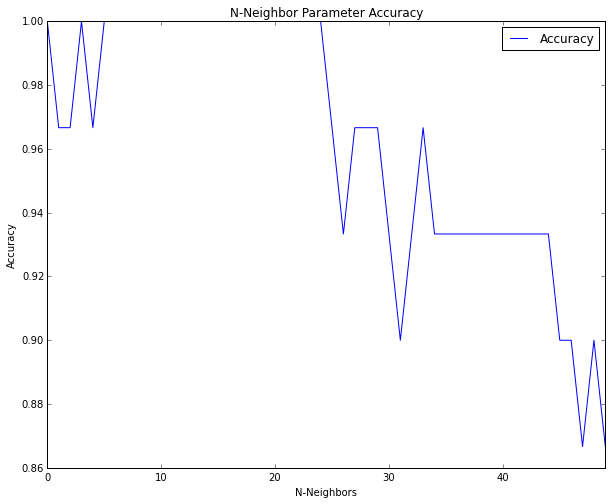

In [28]:
# Create a list of the various numbers of neighbors to use to build models
# Create training and test sets
# Iterate through that list and for each number of neighbors:
#    Build a KNN model
#    Evaluate it
#    Record the score with the number of neighbors for that model
# Plot results
import pandas as pd
%matplotlib inline

n_neighbors = range(1, 51)

scores = []
for n in n_neighbors:
    clf = KNeighborsClassifier(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
    
knn_scores_df = pd.DataFrame(scores, columns=["Accuracy"])
ax = knn_scores_df.plot(figsize=(10,8), title="N-Neighbor Parameter Accuracy")
ax.set_xlabel("N-Neighbors")
ax.set_ylabel("Accuracy")

#### 2. Do different train/test splits affect our score (accuracy)? How much do the scores vary each time you shuffle and split?

In [29]:
# Baseline 80/20
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=0)
myknn = KNeighborsClassifier(2).fit(X_train,y_train)
myknn.score(X_test, y_test)

0.96666666666666667

In [30]:
# Case 1 75/25
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=0)
myknn = KNeighborsClassifier(2).fit(X_train,y_train)
myknn.score(X_test, y_test)

0.97368421052631582

In [31]:
# Case 2 50/50
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.50, random_state=0)
myknn = KNeighborsClassifier(2).fit(X_train,y_train)
myknn.score(X_test, y_test)

0.89333333333333331

In [32]:
# Case 3 30/70
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.70, random_state=0)
myknn = KNeighborsClassifier(2).fit(X_train,y_train)
myknn.score(X_test, y_test)

0.88571428571428568

In [33]:
# Case 4 90/10
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.90, random_state=0)
myknn = KNeighborsClassifier(2).fit(X_train,y_train)
myknn.score(X_test, y_test)

0.91111111111111109